# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **Penjelasan Dataset**
   Dataset yang dipilih merupakan dataset yang berisikan informasi tentang transaksi penjualan yang mencakup detail pesanan, pelanggan, lokasi pengiriman, kategori produk, serta nilai penjualan.
   
   - Informasi Pesanan :
   Row ID,Order ID,Order Date,Ship Date,Ship Mode
   
   - Informasi Pelanggan :
   Customer ID,Customer Name,Segment
   
   - Informasi Lokasi :
   Country,City,State,Postal Code,Region
   
   - Informasi Produk :
   Product ID,Category,Sub-Category,Product Name,Sales

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_classif
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Clustering Classification/Dataset_clustering.csv")
df.head()
df_normalized = df.copy()

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris: 9800, Jumlah kolom: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          

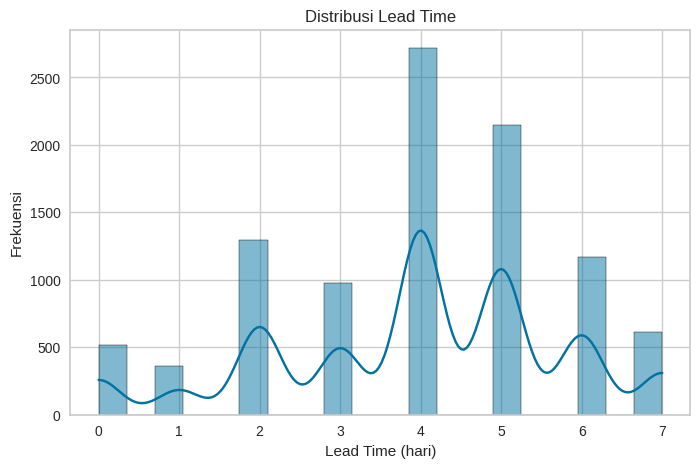

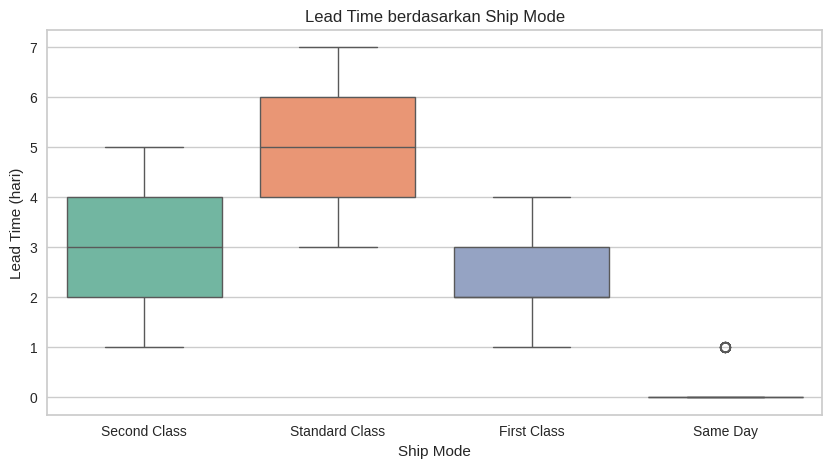

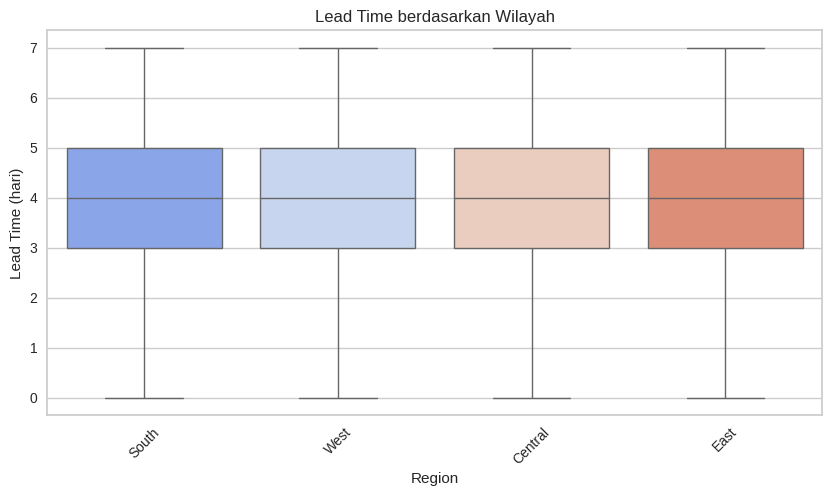

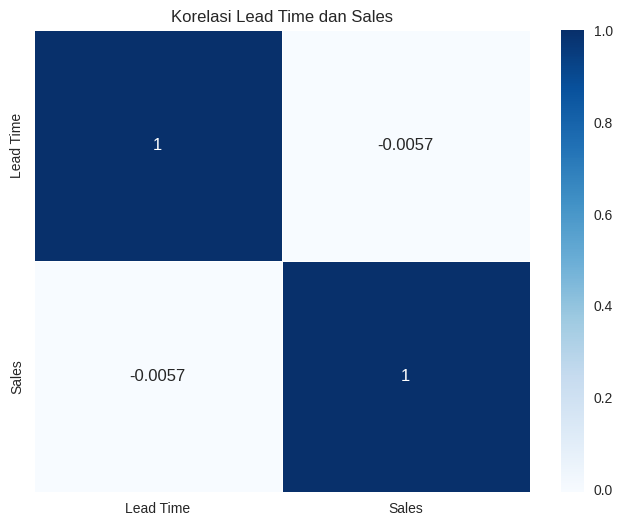

In [ ]:
print(f"Jumlah baris: {df_normalized.shape[0]}, Jumlah kolom: {df_normalized.shape[1]}")
print(df_normalized.info())

df_normalized['Order Date'] = pd.to_datetime(df_normalized['Order Date'], format='%d/%m/%Y')
df_normalized['Ship Date'] = pd.to_datetime(df_normalized['Ship Date'], format='%d/%m/%Y')

df_normalized['Lead Time'] = (df_normalized['Ship Date'] - df_normalized['Order Date']).dt.days

print(df_normalized.describe())

print("Missing values per column:\n", df_normalized.isnull().sum())

plt.figure(figsize=(8, 5))
sns.histplot(df_normalized['Lead Time'], bins=20, kde=True)
plt.title("Distribusi Lead Time")
plt.xlabel("Lead Time (hari)")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Ship Mode", y="Lead Time", hue="Ship Mode", data=df_normalized, palette="Set2")
plt.title("Lead Time berdasarkan Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Lead Time (hari)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Region", y="Lead Time", data=df_normalized, hue="Region", palette="coolwarm")
plt.title("Lead Time berdasarkan Wilayah")
plt.xlabel("Region")
plt.ylabel("Lead Time (hari)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df_normalized[['Lead Time', 'Sales']].corr(), annot=True, cmap="Blues", linewidths=0.5)
plt.title("Korelasi Lead Time dan Sales")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Jumlah data duplikat sebelum dihapus: 0
Jumlah data setelah penghapusan duplikat: 9789 baris
Jumlah data setelah menghapus outlier: 8198 baris
Dataset setelah pembersihan dan transformasi:
   Row ID        Order ID Order Date  Ship Date  Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11          2    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16          2    DV-13045   
4       5  US-2016-108966 2016-10-11 2016-10-18          3    SO-20335   
5       6  CA-2015-115812 2015-06-09 2015-06-14          3    BH-11710   
6       7  CA-2015-115812 2015-06-09 2015-06-14          3    BH-11710   

     Customer Name  Segment        Country             City       State  \
0      Claire Gute        0  United States        Henderson    Kentucky   
2  Darrin Van Huff        1  United States      Los Angeles  California   
4   Sean O'Donnell        0  United States  Fort Lauderdale     Florida   
5  Brosina Hoffman        0  United States      Los Angeles  Calif

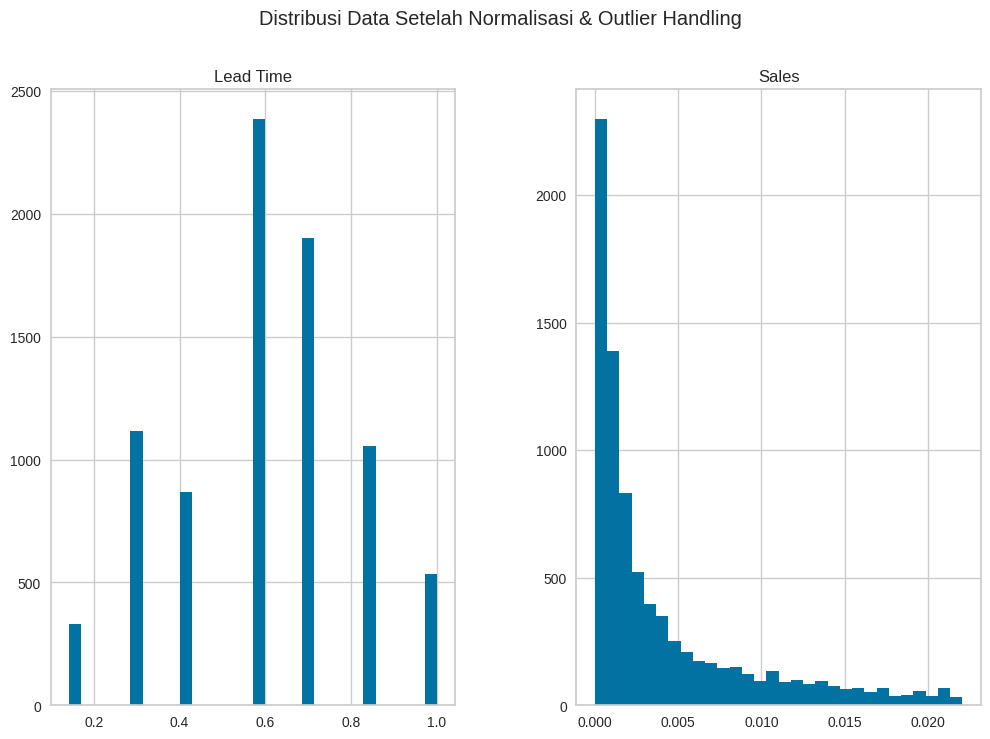

In [ ]:
df_normalized.dropna(inplace=True)

print(f"Jumlah data duplikat sebelum dihapus: {df_normalized.duplicated().sum()}")
df_normalized = df_normalized.drop_duplicates()
print(f"Jumlah data setelah penghapusan duplikat: {df_normalized.shape[0]} baris")

numerical_columns = ['Lead Time', 'Sales']
scaler = MinMaxScaler()
df_normalized[numerical_columns] = scaler.fit_transform(df_normalized[numerical_columns])

Q1 = df_normalized[numerical_columns].quantile(0.25)
Q3 = df_normalized[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_normalized = df_normalized[~((df_normalized[numerical_columns] < lower_bound) | (df_normalized[numerical_columns] > upper_bound)).any(axis=1)]
print(f"Jumlah data setelah menghapus outlier: {df_normalized.shape[0]} baris")

label_encoder = LabelEncoder()
categorical_columns = ['Ship Mode', 'Region', 'Segment', 'Category', 'Sub-Category']
for col in categorical_columns:
    df_normalized[col] = label_encoder.fit_transform(df_normalized[col])

df_normalized['Lead Time Binned'] = pd.qcut(df_normalized['Lead Time'], q=2, labels=['Cepat', 'Lambat'])
df_normalized['Lead Time Binned'] = label_encoder.fit_transform(df_normalized['Lead Time Binned'])
print("Dataset setelah pembersihan dan transformasi:")
print(df_normalized.head())

df_normalized[numerical_columns].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribusi Data Setelah Normalisasi & Outlier Handling")
plt.show()


# hitung lead time dalam satuan hari (tanpa normalisasi)
# df['Lead Time'] = (pd.to_datetime(df['Ship Date'], dayfirst=True) -
#                    pd.to_datetime(df['Order Date'], dayfirst=True)).dt.days

# cek hasil
# print(df[['Order Date', 'Ship Date', 'Lead Time']].head(10))

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# fitur untuk clustering
features = ['Ship Mode', 'Lead Time', 'Region']
X = df_normalized[features]

# standarisasi
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# clustering dengan KMeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_normalized['Cluster'] = kmeans.fit_predict(X_scaled)

print(df_normalized['Cluster'].value_counts())

Cluster
0    3147
2    2891
1    2160
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

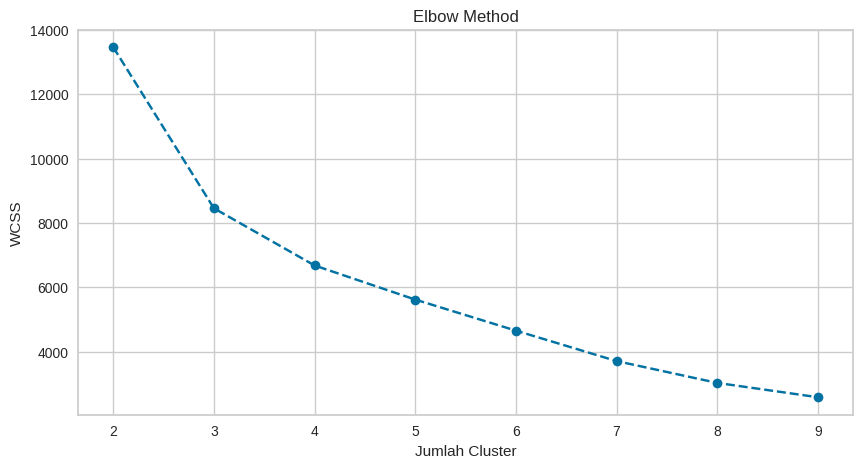

In [ ]:
wcss = []
silhouette_scores = []

for i in range(2, 10):
    kmeans_temp = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    wcss.append(kmeans_temp.inertia_)
    score = silhouette_score(X_scaled, kmeans_temp.labels_)
    silhouette_scores.append(score)

# visualisasi elbow method
plt.figure(figsize=(10,5))
plt.plot(range(2,10), wcss, marker='o', linestyle='--')
plt.xlabel("Jumlah Cluster")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

### **1. Elbow Method**
- Titik elbow terlihat pada jumlah cluster k=3, di mana penurunan WCSS mulai melambat. Hal ini menunjukkan bahwa setelah k=3, penambahan jumlah cluster tidak memberikan pengurangan signifikan pada WCSS.
- Maka dari itu, jumlah cluster optimal berdasarkan metode ini adalah 3.

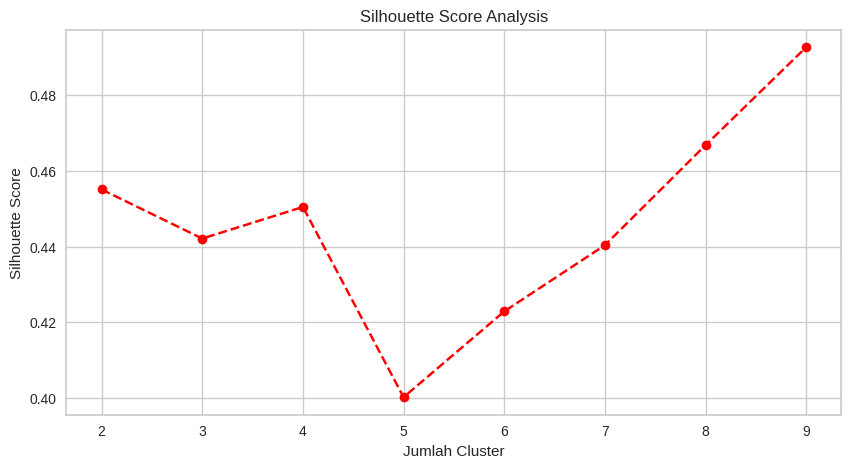

In [ ]:
# visualisasi silhouette score
plt.figure(figsize=(10,5))
plt.plot(range(2,10), silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

### **2. Silhouette Score**
- Skor tertinggi ditemukan pada jumlah cluster k=3, dengan nilai sekitar 0.46.
- Jumlah cluster optimal berdasarkan analisis Silhouette Score juga mendukung hasil dari Elbow Method, yaitu k=3.

### **Kesimpulan**
Berdasarkan kedua metode evaluasi clustering, jumlah cluster yang paling optimal untuk data ini adalah 3.

Dengan memilih k=3, model clustering akan menghasilkan pembagian data yang baik, di mana setiap cluster memiliki karakteristik yang jelas dan terpisah.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
mi_scores = mutual_info_classif(X_scaled, df_normalized['Cluster'])
mi_scores_df = pd.DataFrame({'Feature': features, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)
print(mi_scores_df)

     Feature  MI Score
1  Lead Time      0.53
2     Region      0.50
0  Ship Mode      0.44


# **Penjelasan Feature Selection**
### **Lead Time (0.53)**
Merupakan fitur yang memiliki ketergantungan tertinggi terhadap cluster yang terbentuk. Hal ini menandakan bahwa variasi dalam Lead Time memiliki pengaruh dalam membedakan antar cluster.

### **Region (0.50)**
Skor MI hampir sama dengan Lead Time, yang dapat diartikan fitur Region juga merupakan faktor penting dalam membedakan cluster.

### **Ship Mode (0.44)**
Memiliki skor MI yang lebih rendah dibandingkan dua fitur sebelumnya, namun tetap memberikan pengaruh yang cukup signifikan dalam membentuk cluster.

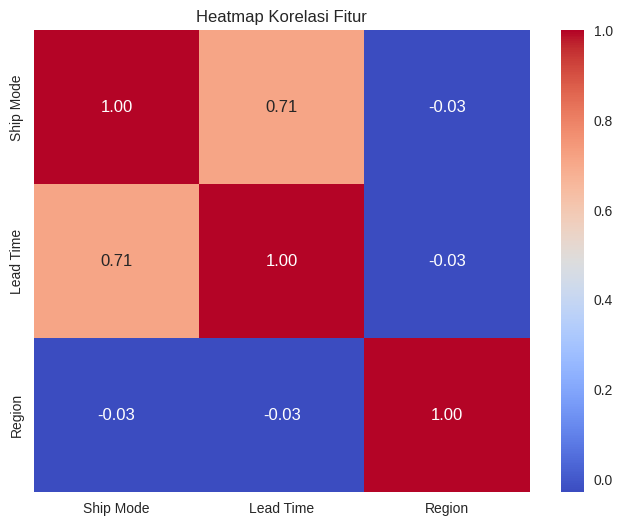

In [ ]:
# korelasi antar fitur
correlation_matrix = pd.DataFrame(X_scaled, columns=features).corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur")
plt.show()

**Korelasi antara Ship Mode dan Lead Time (0.71):**

Menunjukkan korelasi positif antara Ship Mode dan Lead Time. Ini berarti bahwa jenis Ship Mode tertentu memiliki Lead Time yang lebih panjang atau lebih pendek.

**Korelasi antara Region dengan fitur lain (-0.03):**

Region memiliki korelasi yang sangat lemah (mendekati nol) dengan Ship Mode dan Lead Time. Ini mengindikasikan bahwa Region memberikan informasi yang independen dari kedua fitur.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

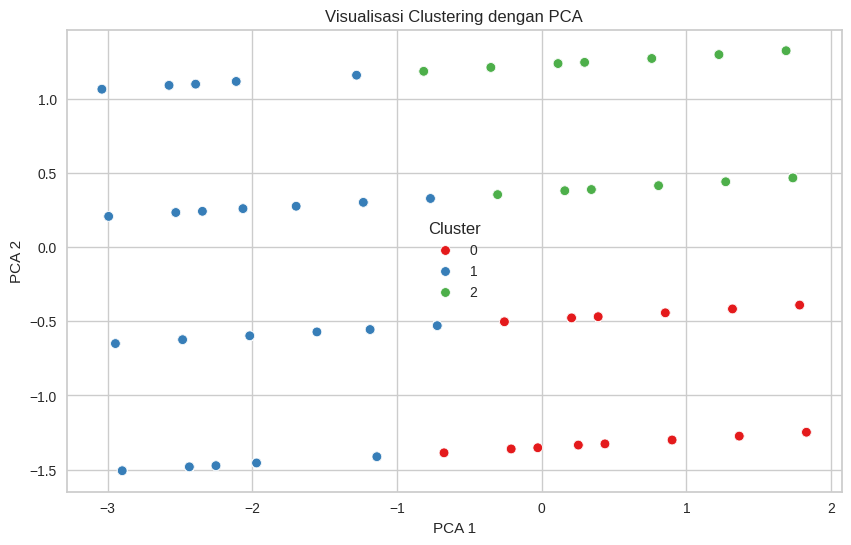

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_normalized['Cluster'], palette='Set1')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisasi Clustering dengan PCA")
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df_normalized['Cluster'] = kmeans.labels_
label_encoders = {}
features_to_inverse = ['Ship Mode', 'Region', 'Lead Time Binned']

for feature in features_to_inverse:
    le = LabelEncoder()
    df_normalized[feature] = le.fit_transform(df_normalized[feature])
    label_encoders[feature] = le

# inverse transform
for feature in features_to_inverse:
    if feature in df_normalized.columns:
        df_normalized[f'{feature}_original'] = label_encoders[feature].inverse_transform(df_normalized[feature])

df_original = df.copy()

for feature in features_to_inverse:
    if f'{feature}_original' in df_normalized.columns:
        df_original[f'{feature}_original'] = df_normalized[f'{feature}_original']


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
numerical_columns = ['Lead Time', 'Sales']

minmax_scaler = MinMaxScaler()
df_normalized[numerical_columns] = minmax_scaler.fit_transform(df_normalized[numerical_columns])  # normalisasi

df_normalized[numerical_columns] = minmax_scaler.inverse_transform(df_normalized[numerical_columns])

print("Dataset setelah inverse transform pada fitur numerik:")
print(df_normalized.head())

Dataset setelah inverse transform pada fitur numerik:
   Row ID        Order ID Order Date  Ship Date  Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11          2    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16          2    DV-13045   
4       5  US-2016-108966 2016-10-11 2016-10-18          3    SO-20335   
5       6  CA-2015-115812 2015-06-09 2015-06-14          3    BH-11710   
6       7  CA-2015-115812 2015-06-09 2015-06-14          3    BH-11710   

     Customer Name  Segment        Country             City  ... Category  \
0      Claire Gute        0  United States        Henderson  ...        0   
2  Darrin Van Huff        1  United States      Los Angeles  ...        1   
4   Sean O'Donnell        0  United States  Fort Lauderdale  ...        1   
5  Brosina Hoffman        0  United States      Los Angeles  ...        0   
6  Brosina Hoffman        0  United States      Los Angeles  ...        1   

   Sub-Category                       

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
df_normalized['Cluster'] = kmeans.labels_
df_numeric = df_normalized.select_dtypes(include=[np.number])
df_numeric = df_numeric.dropna(axis=1, how='all')
cluster_summary = df_numeric.groupby('Cluster').agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
).sort_index()

pd.set_option("display.float_format", "{:.2f}".format)
print(cluster_summary)

        Row ID                                   Ship Mode                   \
         count    mean  median     std min   max     count mean median  std   
Cluster                                                                       
0         3147 4870.78 4822.00 2828.20  15  9800      3147 2.86   3.00 0.35   
1         2160 4806.48 4825.00 2905.67   1  9795      2160 0.76   0.00 0.97   
2         2891 5003.00 5001.00 2797.88   3  9786      2891 2.85   3.00 0.35   

         ... Region_original              Lead Time Binned_original       \
         ...          median  std min max                     count mean   
Cluster  ...                                                               
0        ...            1.00 0.50   0   1                      3147 0.58   
1        ...            1.00 1.12   0   3                      2160 0.00   
2        ...            3.00 0.47   2   3                      2891 0.58   

                             
        median  std min max  
Cluster 

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Analisis Karakteristik Cluster


## Cluster 0:
- **Jumlah Data**: 3147 entri  
- **Rata-rata Row ID**: 4870.78
- **Rata-rata Ship Mode**: 2.86
- **Rata-rata Ship Mode**: 0.58
- **Region**: median = 1.00
- **Analisis**:  
 Cluster 0 terdiri dari pelanggan dengan pengeluaran yang relatif tinggi dan penggunaan mode pengiriman yang bervariasi. Rata-rata Lead Time rendah menunjukkan bahwa pengiriman mungkin lebih cepat untuk pelanggan dalam cluster ini. Bisa menjadi segmen pelanggan yang penting karena pelanggan cenderung melakukan pembelian lebih banyak dan lebih sering.


## Cluster 1:
- **Jumlah Data**: 2160 entri  
- **Rata-rata Row ID**: 4806.48
- **Rata-rata Ship Mode**: 0.76
- **Rata-rata Ship Mode**: 0.00
- **Region**: median = 1.00
- **Analisis**:  
 Cluster 1 terdiri dari pelanggan dengan pengeluaran yang lebih rendah dan frekuensi penggunaan mode pengiriman yang rendah. Rata-rata Lead Time adalah nol mungkin menunjukkan bahwa pelanggan tidak melakukan banyak transaksi/lead time tidak ada. Hal ini bisa menjadi segmen yang perlu ditargetkan dengan promosi atau penawaran khusus untuk meningkatkan keterlibatan dan pembelian.


## Cluster 2:
- **Jumlah Data**: 2891 entri  
- **Rata-rata Row ID**: 5003.00
- **Rata-rata Ship Mode**: 2.85
- **Rata-rata Ship Mode**: 0.58
- **Region**: median = 3.00
- **Analisis**:  
 Cluster 2 terdiri dari pelanggan dengan pengeluaran tinggi yang memilih mode pengiriman yang sama dengan Cluster 0 tetapi berasal dari Region yang berbeda (Region 3). Rata-rata Lead Time yang sama menunjukkan pola pengiriman serupa dengan Cluster 0. Pada cluster ini ada peluang untuk menargetkan pelanggan di Region dengan penawaran layanan tambahan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# df.to_csv("/content/drive/MyDrive/Clustering Classification/hasil_cluster.csv", index=False)
df_normalized.to_csv("hasil_cluster.csv", index=False)

from google.colab import files
files.download("hasil_cluster.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>